# Import packages

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
sklearn.set_config(display='text')
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Load and read the data

In [32]:
data = pd.read_csv('E:\jar-model\jartest_augmented1.csv')
data = data.drop(columns=['Date'])
data.head()

<>:1: SyntaxWarning: invalid escape sequence '\j'
<>:1: SyntaxWarning: invalid escape sequence '\j'
C:\Users\HP\AppData\Local\Temp\ipykernel_24748\197773713.py:1: SyntaxWarning: invalid escape sequence '\j'
  data = pd.read_csv('E:\jar-model\jartest_augmented1.csv')


,Raw_Turbidity,Raw_PH,Raw_Colour,PAC,KMnO4,ACD,Turbidity,PH,Colour
0,90.4,7.07,500.0,2.5,0.4,0.5,19.0,7.07,48.0
1,90.4,7.07,500.0,3.0,0.4,0.5,14.2,7.05,39.0
2,90.4,7.07,500.0,3.5,0.4,0.5,12.6,7.02,31.0
3,90.4,7.07,500.0,4.0,0.4,0.5,10.6,6.98,27.0
4,90.4,7.07,500.0,4.5,0.4,0.5,10.7,6.93,29.0


In [33]:
# Drop rows with missing target values
data = data.dropna(subset=['Turbidity', 'PH', 'Colour'])
data.head()

,Raw_Turbidity,Raw_PH,Raw_Colour,PAC,KMnO4,ACD,Turbidity,PH,Colour
0,90.4,7.07,500.0,2.5,0.4,0.5,19.0,7.07,48.0
1,90.4,7.07,500.0,3.0,0.4,0.5,14.2,7.05,39.0
2,90.4,7.07,500.0,3.5,0.4,0.5,12.6,7.02,31.0
3,90.4,7.07,500.0,4.0,0.4,0.5,10.6,6.98,27.0
4,90.4,7.07,500.0,4.5,0.4,0.5,10.7,6.93,29.0


In [34]:
X_turbidity = data[['Raw_Turbidity', 'Raw_Colour', 'Raw_PH', 'PAC', 'KMnO4','ACD']]
X_ph = data[['Raw_Turbidity', 'Raw_Colour', 'Raw_PH', 'PAC', 'KMnO4','ACD']]
X_colour = data[['Raw_Turbidity', 'Raw_Colour', 'Raw_PH', 'PAC', 'KMnO4','ACD']]
y_turbidity = data['Turbidity']
y_ph = data['PH']
y_colour = data['Colour']

# Model development

## Turbidiy

In [35]:
X_turbidity_train, X_turbidity_test, y_turbidity_train, y_turbidity_test = train_test_split(X_turbidity, y_turbidity, test_size=0.2, random_state=42)

In [36]:
# Initialize RandomForest model for Turbidity
evaluate_model = None  # placeholder to preserve context if any
model_turbidity = RandomForestRegressor(n_estimators=100, random_state=42)
model_turbidity.fit(X_turbidity_train, y_turbidity_train)

RandomForestRegressor(random_state=42)

## PH

In [37]:
X_ph_train, X_ph_test, y_ph_train, y_ph_test = train_test_split(X_ph, y_ph, test_size=0.2, random_state=42)

In [38]:
model_ph =  RandomForestRegressor(
    n_estimators=200,
    min_samples_split=2,
    min_samples_leaf=2,
    max_features="sqrt",
    max_depth=None,
    bootstrap=False,
    random_state=42
)

In [39]:
model_ph.fit(X_ph_train, y_ph_train)

RandomForestRegressor(bootstrap=False, max_features='sqrt', min_samples_leaf=2,
                      n_estimators=200, random_state=42)

## Colour

In [40]:
X_colour_train, X_colour_test, y_colour_train, y_colour_test = train_test_split(X_colour, y_colour, test_size=0.2, random_state=42)

In [41]:
model_colour = RandomForestRegressor(
    n_estimators=300,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features="log2",
    max_depth=None,
    bootstrap=False,
    random_state=42
)

In [42]:
model_colour.fit(X_colour_train, y_colour_train)

RandomForestRegressor(bootstrap=False, max_features='log2', n_estimators=300,
                      random_state=42)

# Model Testing & Validation

In [43]:
y_turbidity_pred = model_turbidity.predict(X_turbidity_test)
y_turbidity_pred

array([19.70529999, 25.87075154,  5.84030109, ..., 17.77491613,
       13.62234396, 37.99742784], shape=(2043,))

In [44]:
results_Tur = pd.DataFrame({
    'Actual': y_turbidity_test.flatten() if hasattr(y_turbidity_test, 'flatten') else y_turbidity_test,
    'Predicted': y_turbidity_pred.flatten() if hasattr(y_turbidity_pred, 'flatten') else y_turbidity_pred
})


results_Tur

,Actual,Predicted
718,11.000000,19.705300
1578,30.100000,25.870752
4291,1.920000,5.840301
33,11.000000,14.310863
9305,21.136299,19.297287
...,...,...
3602,5.590000,8.871955
8060,35.173493,38.851639
8229,19.800315,17.774916
1400,13.900000,13.622344


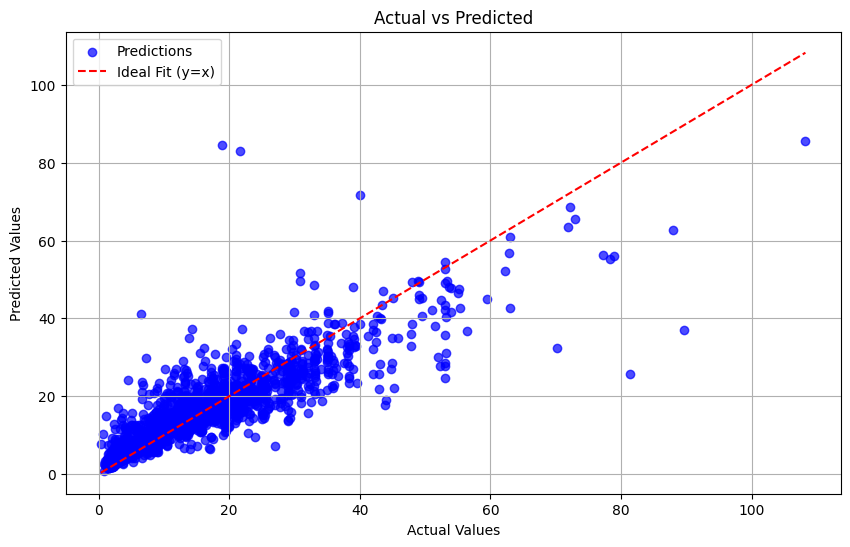

In [45]:
import matplotlib.pyplot as plt

# Scatter plot with actual values on the x-axis and predicted values on the y-axis
plt.figure(figsize=(10, 6))

plt.scatter(results_Tur['Actual'], results_Tur['Predicted'], color='blue', alpha=0.7, label='Predictions')

# Adding a reference line (y = x) for comparison
min_val = min(results_Tur['Actual'].min(), results_Tur['Predicted'].min())
max_val = max(results_Tur['Actual'].max(), results_Tur['Predicted'].max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal Fit (y=x)')

# Labels, title, and legend
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()

# Display the plot
plt.show()

In [46]:
y_ph_pred = model_ph.predict(X_ph_test)
y_ph_pred

array([6.90561415, 6.90771636, 7.48528903, ..., 6.87757883, 6.869513  ,
       7.47780453], shape=(2043,))

In [47]:
results_Ph = pd.DataFrame({
    'Actual': y_ph_test.flatten() if hasattr(y_ph_test, 'flatten') else y_ph_test,
    'Predicted': y_ph_pred.flatten() if hasattr(y_ph_pred, 'flatten') else y_ph_pred
})

results_Ph

,Actual,Predicted
718,6.880000,6.905614
1578,6.910000,6.907716
4291,7.420000,7.485289
33,6.990000,7.001026
9305,7.346344,7.334443
...,...,...
3602,7.350000,7.353341
8060,7.116047,7.087916
8229,6.994891,6.877579
1400,6.790000,6.869513


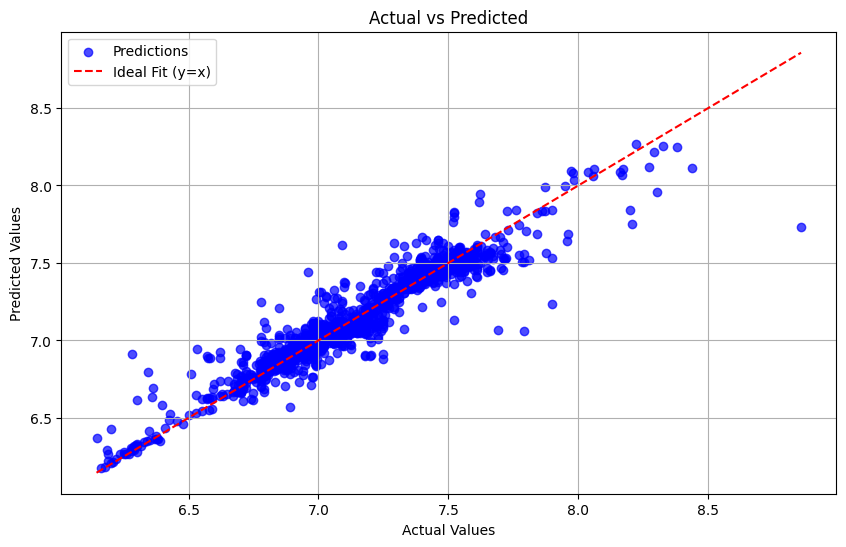

In [48]:
import matplotlib.pyplot as plt

# Scatter plot with actual values on the x-axis and predicted values on the y-axis
plt.figure(figsize=(10, 6))

plt.scatter(results_Ph['Actual'], results_Ph['Predicted'], color='blue', alpha=0.7, label='Predictions')

# Adding a reference line (y = x) for comparison
min_val = min(results_Ph['Actual'].min(), results_Ph['Predicted'].min())
max_val = max(results_Ph['Actual'].max(), results_Ph['Predicted'].max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal Fit (y=x)')

# Labels, title, and legend
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()

# Display the plot
plt.show()


In [49]:
y_colour_pred = model_colour.predict(X_colour_test)
y_colour_pred

array([39.56447221, 36.89491371, 27.53779137, ..., 42.37529032,
       28.59707325, 65.98869121], shape=(2043,))

In [50]:
results_Colo = pd.DataFrame({
    'Actual': y_colour_test.flatten() if hasattr(y_colour_test, 'flatten') else y_colour_test,
    'Predicted': y_colour_pred.flatten() if hasattr(y_colour_pred, 'flatten') else y_colour_pred
})

results_Colo

,Actual,Predicted
718,19.000000,39.564472
1578,35.000000,36.894914
4291,11.000000,27.537791
33,22.000000,22.740292
9305,39.826495,37.032866
...,...,...
3602,12.000000,26.101555
8060,80.139079,69.193186
8229,38.729128,42.375290
1400,33.000000,28.597073


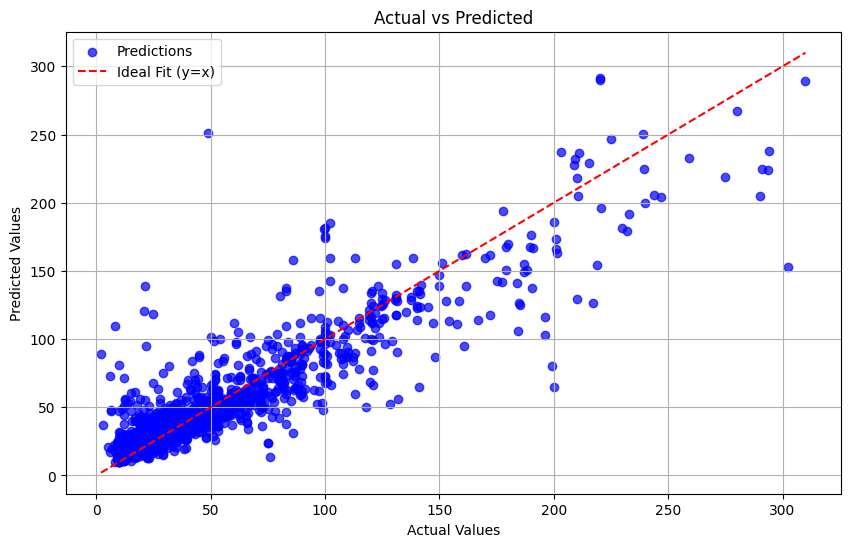

In [51]:
import matplotlib.pyplot as plt

# Scatter plot with actual values on the x-axis and predicted values on the y-axis
plt.figure(figsize=(10, 6))

plt.scatter(results_Colo['Actual'], results_Colo['Predicted'], color='blue', alpha=0.7, label='Predictions')

# Adding a reference line (y = x) for comparison
min_val = min(results_Colo['Actual'].min(), results_Colo['Predicted'].min())
max_val = max(results_Colo['Actual'].max(), results_Colo['Predicted'].max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal Fit (y=x)')

# Labels, title, and legend
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()

# Display the plot
plt.show()


In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(y_test, y_pred, target_name):
    r2 = r2_score(y_test, y_pred)
    accuracy = r2 * 100  # Convert R² to percentage
    print(f"\nEvaluation Metrics for {target_name}:")
    print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"R-squared (R²): {r2:.2f}")


evaluate_model(y_turbidity_test, y_turbidity_pred, "Turbidity")
evaluate_model(y_ph_test, y_ph_pred, "PH")
evaluate_model(y_colour_test, y_colour_pred, "Colour")



Evaluation Metrics for Turbidity:
Mean Absolute Error (MAE): 3.51
R-squared (R²): 0.73

Evaluation Metrics for PH:
Mean Absolute Error (MAE): 0.05
R-squared (R²): 0.92

Evaluation Metrics for Colour:
Mean Absolute Error (MAE): 9.41
R-squared (R²): 0.83
